
📌 Model: Random Forest
Accuracy: 0.995
F1 Score: 0.9949748743718593
Confusion Matrix:
 [[100   0]
 [  1  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200


📌 Model: Logistic Regression
Accuracy: 0.995
F1 Score: 0.9949748743718593
Confusion Matrix:
 [[100   0]
 [  1  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200


📌 Model: Decision Tree
Accuracy: 0.995
F1 Score: 0.9949748743718593
C

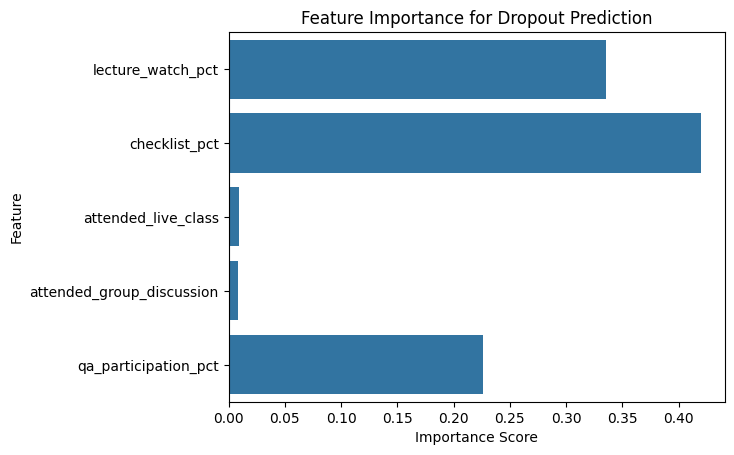

In [9]:
# dropout_prediction_rf.ipynb

# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.utils import resample
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
df = pd.read_csv("balanced_student_dataset_formated.csv")

# 3. Define features & target
features = ['lecture_watch_pct', 'checklist_pct', 'attended_live_class',
            'attended_group_discussion', 'qa_participation_pct']
X = df[features]
y = df['dropout']

# 4. Balance dataset with upsampling
majority = df[df.dropout == 0]
minority = df[df.dropout == 1]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
df_balanced = pd.concat([majority, minority_upsampled])
X_bal = df_balanced[features]
y_bal = df_balanced['dropout']

# 5. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42
)

# 6. Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Support Vector Machine": SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 7. Train & Evaluate Models
best_model = None
best_f1 = 0
for name, model in models.items():
    print(f"\n\U0001F4CC Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    if f1 > best_f1:
        best_f1 = f1
        best_model = model

# 8. Save Best Model
joblib.dump(best_model, "best_dropout_model.pkl")
print("\n\U0001F4BE Best model saved as best_dropout_model.pkl")

# 9. Feature Importance (for Random Forest only)
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    sns.barplot(x=importances, y=features)
    plt.title("Feature Importance for Dropout Prediction")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()


In [5]:
df['dropout'].value_counts()

dropout
1    500
0    500
Name: count, dtype: int64

In [7]:
df.tail()

,student_id,lecture_watch_pct,checklist_pct,attended_live_class,attended_group_discussion,qa_participation_pct,dropout,recommended_activities
996,S271_D0,99,88,1,1,67,0,"Good Job, You did Well in the Week. Keep the m..."
997,S361_D1,44,36,1,0,30,1,Increase your lecture video completion to at l...
998,S436_D0,85,73,1,1,65,0,"Good Job, You did Well in the Week. Keep the m..."
999,S103_D0,81,90,1,1,67,0,"Good Job, You did Well in the Week. Keep the m..."
1000,S103_D1,0,0,0,0,0,1,Increase your lecture video completion to at l...
